<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/1_introduccion/clase_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase 2: Introducción a IA


### Aprendizaje Supervisado

Es cuando entregamos la variable que debemos encontrar

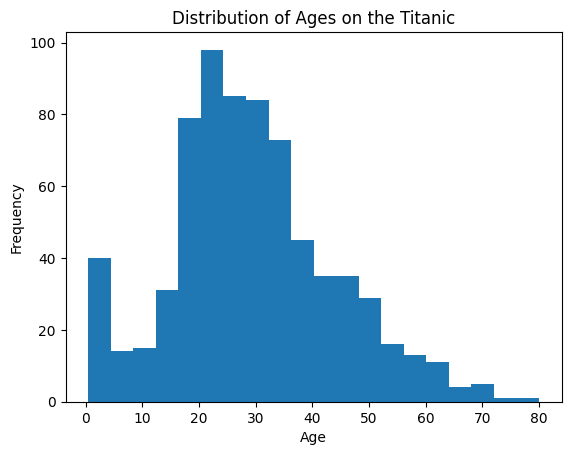

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

# Example plot: Distribution of ages
titanic['age'].plot(kind='hist', bins=20, title='Distribution of Ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# You can replace the above with other plots like:
# titanic['class'].value_counts().plot(kind='bar', title='Passenger Class Distribution')
# titanic.groupby('pclass')['survived'].mean().plot(kind='bar', title='Survival Rate by Passenger Class')

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Diccionario de datos: Dataset Titanic (Seaborn)

## Variables originales
- **survived**: 0 = no sobrevivió, 1 = sobrevivió.
- **pclass**: Clase del pasajero (1 = Primera, 2 = Segunda, 3 = Tercera).
- **sex**: Sexo del pasajero (`male` = hombre, `female` = mujer).
- **age**: Edad en años (puede contener valores faltantes).
- **sibsp**: Número de hermanos/as o cónyuges a bordo.
- **parch**: Número de padres/madres o hijos/as a bordo.
- **fare**: Tarifa pagada por el boleto (en libras esterlinas).
- **embarked**: Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton).

## Variables derivadas
- **class**: Versión categórica de `pclass` (`First`, `Second`, `Third`).
- **who**: Categoría del pasajero (`man`, `woman`, `child`).
- **adult_male**: Booleano; indica si es un hombre adulto.
- **deck**: Cubierta del barco (A, B, C...), valores faltantes si no se conoce.
- **embark_town**: Ciudad correspondiente al puerto de embarque.
- **alive**: Versión categórica de `survived` (`yes` o `no`).
- **alone**: Booleano; indica si el pasajero viajaba solo.


In [7]:
import pandas as pd

# Assuming the titanic DataFrame is already loaded from a previous cell
# If not, load it here:
# import seaborn as sns
# titanic = sns.load_dataset('titanic')

# Group by passenger class, sex, and survival status and count the occurrences
survival_by_class_sex = titanic.groupby(['pclass', 'sex', 'survived']).size().unstack(fill_value=0)

# Rename columns for clarity
survival_by_class_sex.columns = ['Did Not Survive', 'Survived']

# Display the resulting DataFrame
display(survival_by_class_sex)

Did Not Survive  Survived
pclass sex                              
1      female                3        91
       male                 77        45
2      female                6        70
       male                 91        17
3      female               72        72
       male                300        47

In [8]:
# Assuming the titanic DataFrame is already loaded from a previous cell
# If not, load it here:
# import seaborn as sns
# titanic = sns.load_dataset('titanic')

# Filter the DataFrame to include only children
children_titanic = titanic[titanic['who'] == 'child']

# Group by passenger class and survival status and count the occurrences
survival_by_class_children = children_titanic.groupby(['pclass', 'survived']).size().unstack(fill_value=0)

# Rename columns for clarity
survival_by_class_children.columns = ['Did Not Survive', 'Survived']

# Display the resulting DataFrame
display(survival_by_class_children)

,Did Not Survive,Survived
pclass,,
1,1,5
2,0,19
3,33,25


### Aprendizaje Nosupervisado

Es cuando no entregamos la variable que debemos encontrar, y el algorirtmo escuentra agrupaciones u otro tipo de respuestas

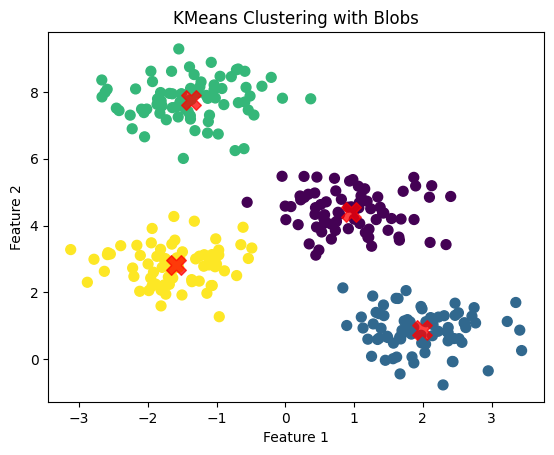

In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data with make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
kmeans.fit(X)

# Plot the data points and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('KMeans Clustering with Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

/tmp/ipython-input-3959129513.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)
/tmp/ipython-input-3959129513.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

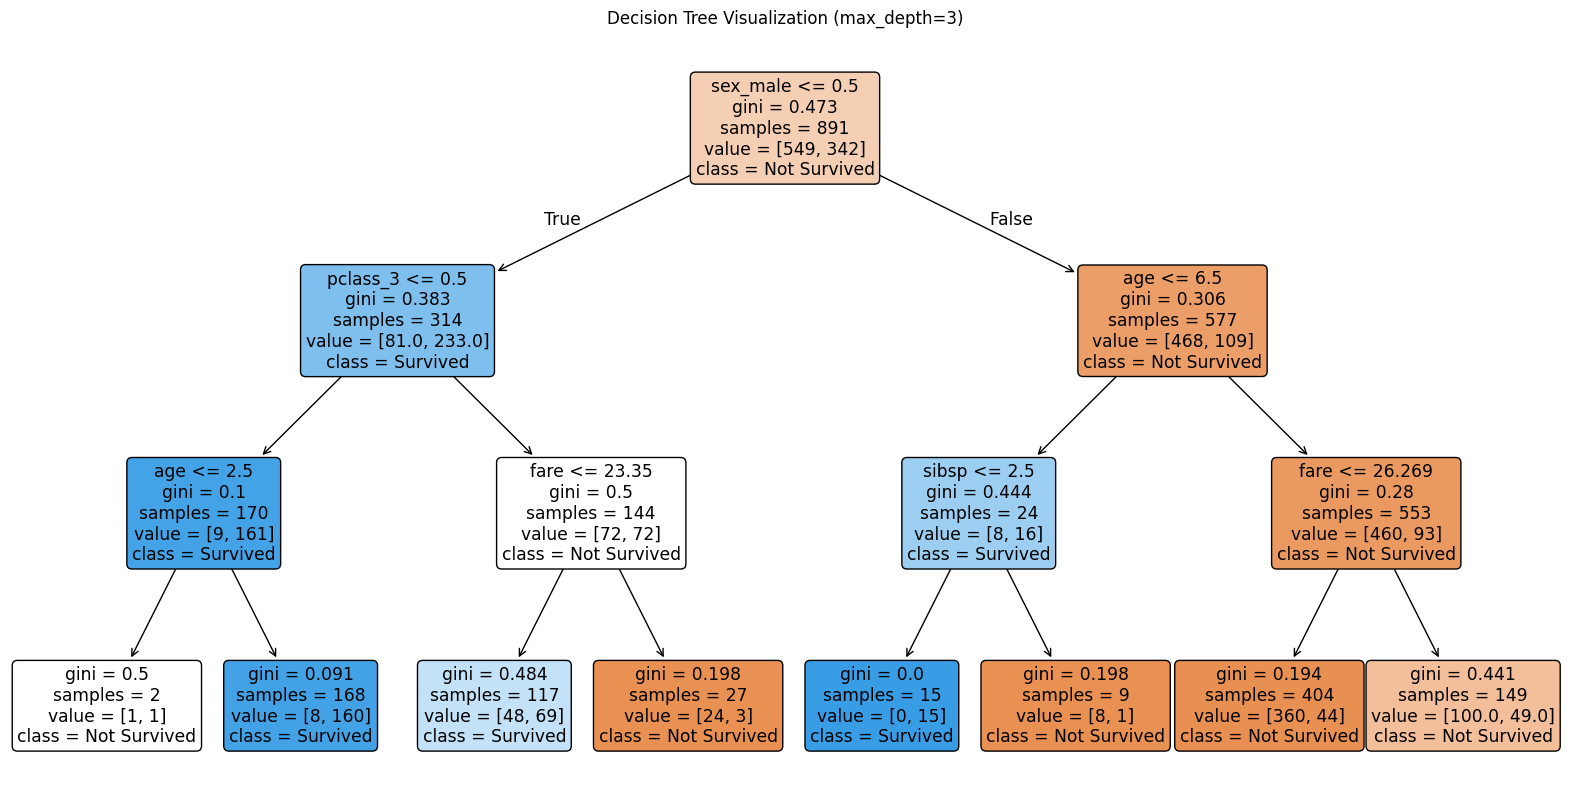

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the dataset (assuming it's already loaded from previous cells)
# If not, you can load it here:
# titanic = sns.load_dataset('titanic')

# Prepare the data for the decision tree
# We'll use 'pclass', 'sex', 'age', 'sibsp', 'parch', and 'fare' as features
# And 'survived' as the target variable
# Handle missing values in 'age' and 'embarked'
titanic['age'].fillna(titanic['age'].median(), inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical using one-hot encoding
titanic_processed = pd.get_dummies(titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']], columns=['pclass', 'sex', 'embarked'], drop_first=True)

# Define features (X) and target (y)
X = titanic_processed
y = titanic['survived']

# Create and train the Decision Tree Classifier
# We'll limit the depth for better visualization
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=0)
dt_classifier.fit(X, y)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title('Decision Tree Visualization (max_depth=3)')
plt.show()

### Overfitting y underfitting

![Overfitting y underfitting](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)